## Chapter 2 : End to end Machine Learning ##
### Prediction of **median house prices** in *US* ###

1.This is a function which fetches data from internet and make a directory.


In [1]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing =load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

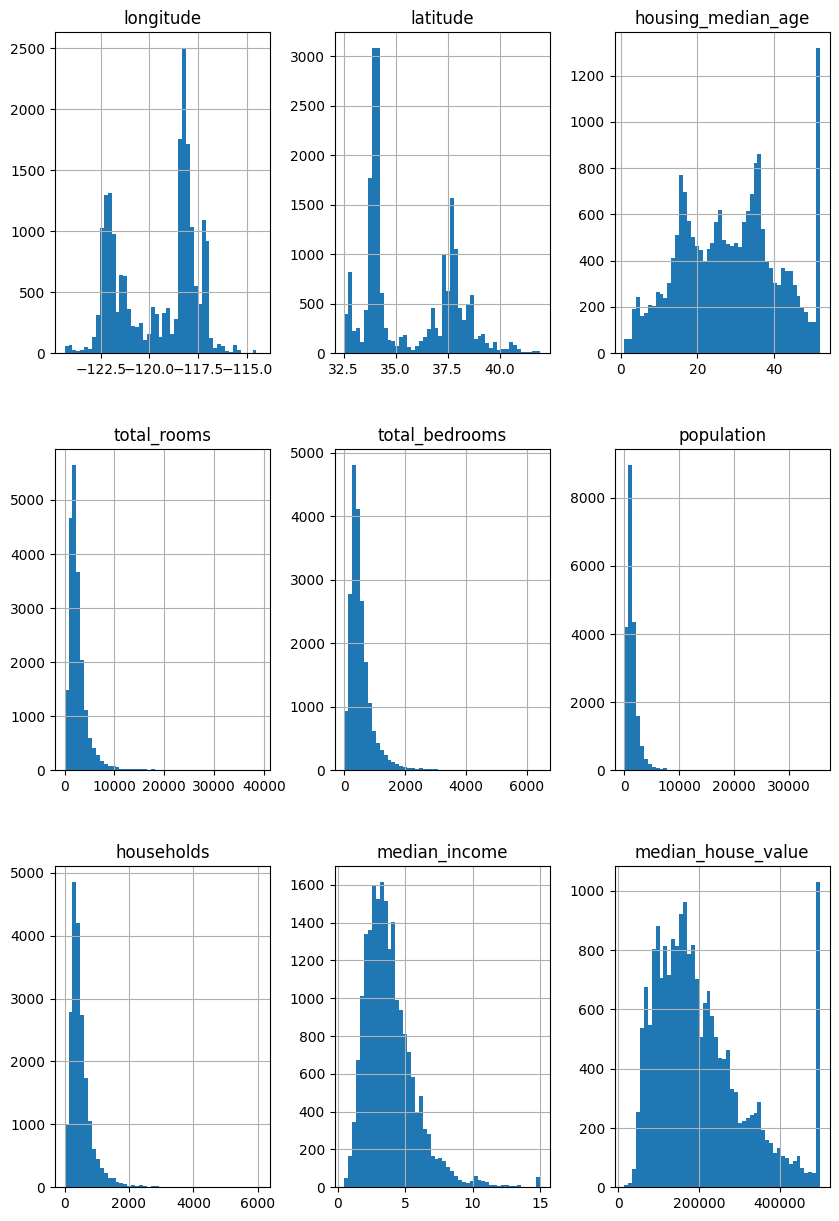

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(10,15))

2. Now we will be making a training set through a function.

In [9]:
import numpy as np
def split_train_test(data , test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

train_set,test_set=split_train_test(housing, 0.2)
print(f"{len(train_set)},{len(test_set)}")


16512,4128


**Doing the same task using sklearn library**

In [10]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

*The data is not always random as most of the times setting it completely random make the data biased for example women in the US population . In case of the median income we see that the most of the income lies betweeen 15000$ and 60000$ but we should have more skewed data as it better represents the whole population.*

**For this reason we will cut the median income into different strata ( subgroups ) and add another column in the data set**

<Axes: >

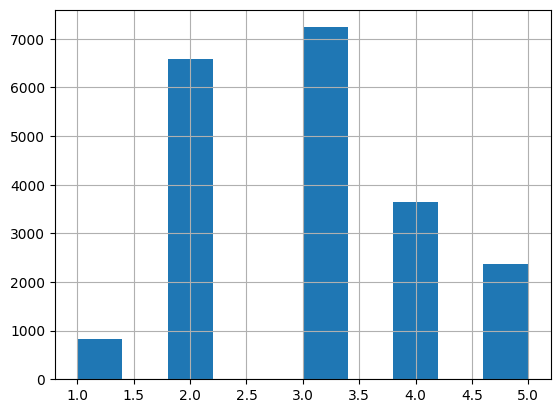

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

*Now as we have seperate subgroups we are ready to to do startified sampling so we have corresponding amount of representation from each subgroup , For this you can use Scikit-Learn’s StratifiedShuffleSplit class*

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2 ,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [13]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

*Now we will delete the income cat column from our data set as it's sole purpose was to help us with startified sampling*

In [14]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat" , axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights ##

In [15]:
explore_train = strat_train_set.copy()
explore_train_wocean=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

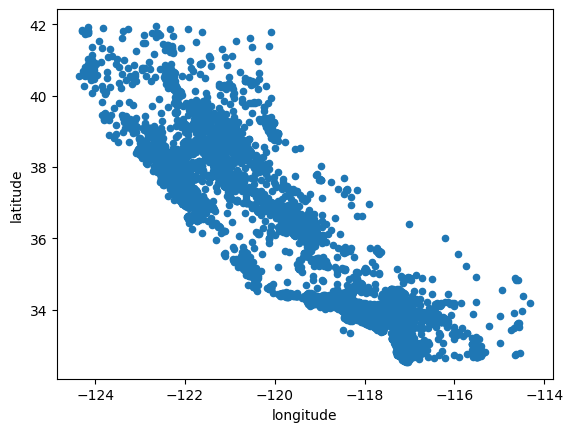

In [16]:
explore_train.plot(kind='scatter' , x='longitude' , y='latitude' , legend="on")

**TO explore in depth the places of high density put alpha = 0.1**

<Axes: xlabel='longitude', ylabel='latitude'>

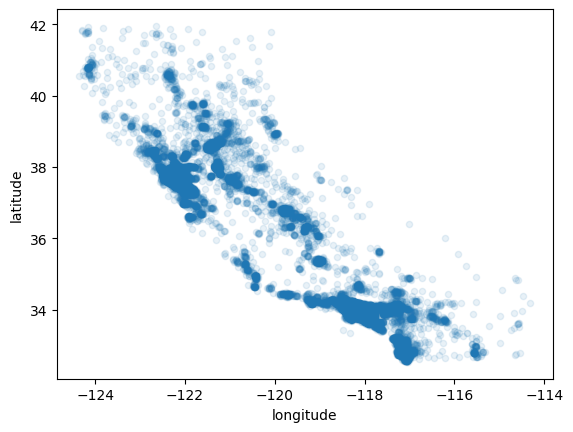

In [17]:
explore_train.plot(kind='scatter' , x='longitude' , y='latitude' ,alpha=0.1,legend="on")

**Making it a bit more colorful so better insights could be made**

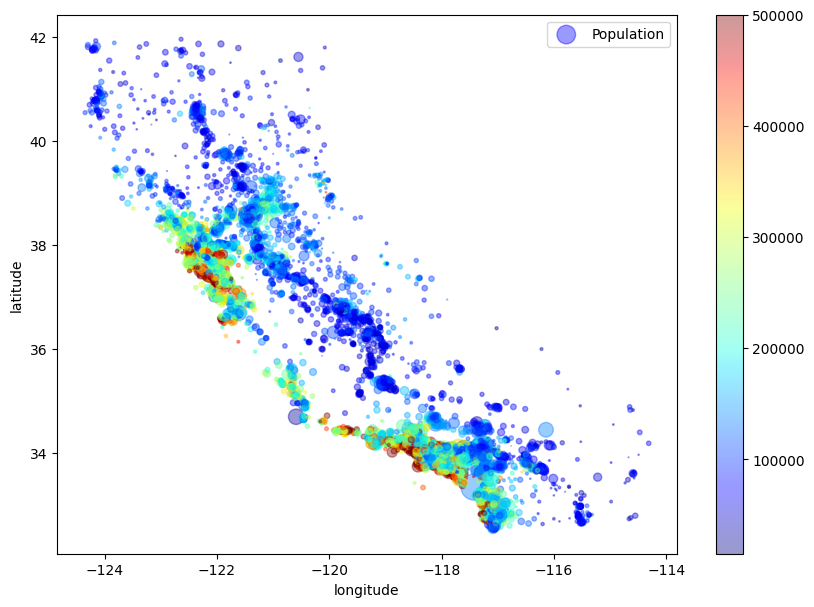

In [18]:
explore_train.plot(kind='scatter',x='longitude' ,y='latitude' , alpha=0.4,
                   s=explore_train['population']/100 , label="Population" , figsize=(10,7),
                   c=explore_train['median_house_value'] , cmap=plt.get_cmap('jet') ,colorbar=True)
plt.legend()

**Other variations can also be performed in this code**
*In this code I have inversed the roles of color and sizes . Here the colors represent the median income and the sizes represent the population *

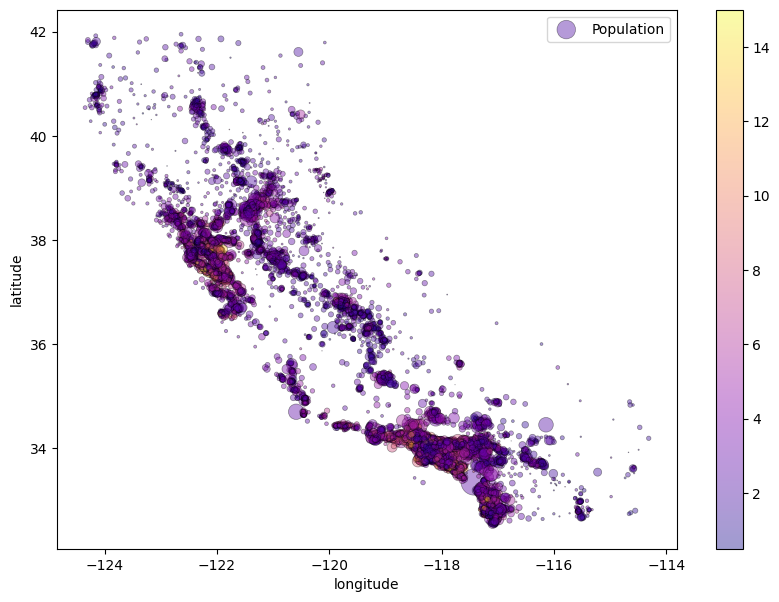

In [19]:
explore_train.plot(kind='scatter',x='longitude' ,y='latitude' , alpha=0.4,
                   s=explore_train['population']/100 , label="Population" , figsize=(10,7),
                   c=explore_train['median_income'] , cmap=plt.get_cmap('plasma') ,edgecolor="black" , linewidth=0.5,marker='o',colorbar=True)
plt.legend()

- Here we can extract that the prices are higher near the ocean , but it's not always necessarily true as we can see that this in not the case in northern california .
- So we will rather make a corelation matrix through which we can see how much a variable co relates with each other .

In [20]:

explore_train=explore_train.drop("ocean_proximity",axis=1)


In [21]:
corr_matrix=explore_train.corr()

In [22]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- We can also check the co-relation between various numerical values usign the scatter_matrix() function of pandas library , it will give the plot or co-relation between every numeric attribute in your data
- We will just be using 4 5 attributes which we have seen have some corelation with median_house_value so we can have limited number of plots

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

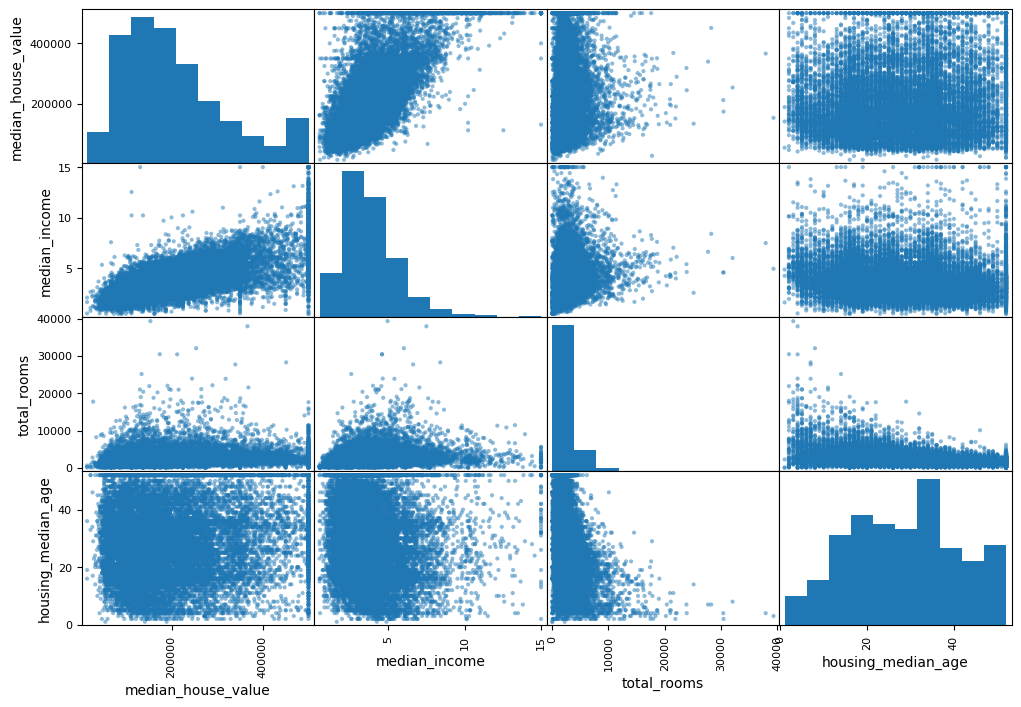

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(explore_train[attributes] , figsize=(12,8))

- plotting just the median house value wrt median income 

<Axes: xlabel='median_income', ylabel='median_house_value'>

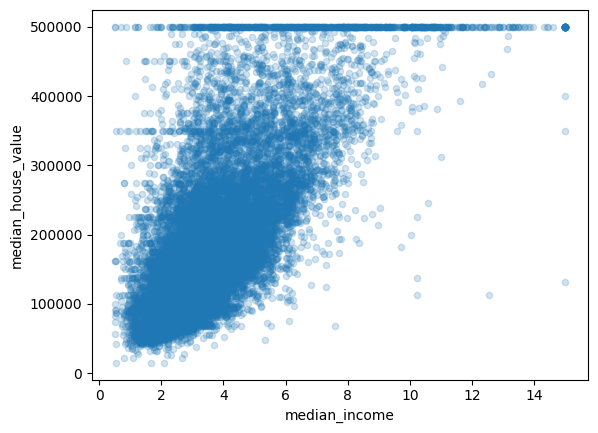

In [24]:
explore_train.plot(kind='scatter' , x='median_income' , y='median_house_value' , alpha=0.2)

- We can see that the total_rooms or total_bedrooms aren't giving us any good information . So we will convert into different useful variable which can be used later

In [25]:
explore_train['rooms_per_household']=explore_train['total_rooms']/explore_train['households']
explore_train['bedrooms_per_rooms']=explore_train['total_bedrooms']/explore_train['total_rooms']
explore_train['population_per_household']=explore_train['population']/explore_train['households']

In [26]:
explore_train_wocean['rooms_per_household']=explore_train_wocean['total_rooms']/explore_train_wocean['households']
explore_train_wocean['bedrooms_per_rooms']=explore_train_wocean['total_bedrooms']/explore_train_wocean['total_rooms']
explore_train_wocean['population_per_household']=explore_train_wocean['population']/explore_train_wocean['households']

- Now lets see the corelation matrix again 

In [27]:
updated_corr_matrix=explore_train.corr()
updated_corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_household,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [28]:
updated_corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

### We are getting into Data transformation to make it ready for algorithms ###

- First we will seperate the predictors and labels

In [29]:
house= strat_train_set.drop('median_house_value',axis=1)
house_label=strat_train_set['median_house_value'].copy()
house_label

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

- **Data Cleaning :**
*We have seen that total bedrooms have some missing values and it has to be fixed , for that we have various option like dropping the whole column , drop those districts or fill them with a mean or median value*

In [30]:
option1 = house.drop('total_bedrooms',axis=1) # Not a viable approach of course
option2 =house.dropna(subset=['total_bedrooms'])# better , only removing districts with missign total bedrooms entry
median=house['total_bedrooms'].median()
house['total_bedrooms'].fillna(median , inplace=True)

*We do have a seperate library to deal with the missing values known as SimpleImputer*

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num=house.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
print(f"{imputer.statistics_} ,\n {housing_num.median().values}")

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155] ,
 [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


**Now that we can see that both the imputer stats and the data set medians are the same, we can transform the dataset**

In [33]:
imputed_dat=imputer.transform(housing_num)


*This is not in the pabdas dataframe format and it is needed to be done*

In [34]:
imputed_data=pd.DataFrame(imputed_dat, columns=housing_num.columns , index=housing_num.index)
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


**We dealt with the numeric data but not with the textual data . Inorder to work with them we can convert it into numeric data as python loves to deal with numeric data** 


*We do have scikit learn ordinal class for that*

In [35]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = house[['ocean_proximity']].copy()
ordinalencoder=OrdinalEncoder()
housing_cat_encoded=ordinalencoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

**This has some issues with it as when the categories increases from binary the classification become erroeous most of the times**

**For this reason we use one hot encoding , basically this for every instance in ocean proximity tells true(1) or false(0) like INLAND (yes/no)**

In [36]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
housing_cat_hot_encoded=onehotencoder.fit_transform(housing_cat)
housing_cat_hot_encoded[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

## Feature Scaling ##

**We can wittness that feature like total bedrooms lie from 6 to 39000 while the median income varies from 1.5 to 6 . Your model usually dont perform on such varying data so feature scaling is required there out of which normalization (min/max scalling) is most common**

- Min max scalling subtracts the minimum value and divides it by max-min to make it lie between 0 and 1 (normalization) . scikit learn has a libraru MinMaxScaler for this purpose . feature_range hyperparameter can be used to change these limits of normalization.
- Whereas standardization works by subtracting the mean value from every entry to make it zero mean values and divide it my standard deviation so that it would have unit variance . We have library standard scaler for standardization .

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [38]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)


**Now we wish to deal the numeric aswell as categoriacal data simultaniously**

- We can use columntransformer a builtin scikitlearn function to deal with it

In [39]:
explore_train_wocean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_rooms', 'population_per_household'],
      dtype='object')

In [40]:
from sklearn.compose import ColumnTransformer
num_attrb=list(housing_num)
cat_attrb=['ocean_proximity']
full_pipline=ColumnTransformer([
    ('num',num_pipeline,num_attrb),
    ('cat',OneHotEncoder(),cat_attrb),
])
housing_prepared=full_pipline.fit_transform(house)
housing_prepared


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## Applying the Machine Learning Model ##

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,house_label)
some_data=house[:5]
some_labels=house_label[:5]
some_prepared=full_pipline.transform(some_data)
print("Predictions: " , lin_reg.predict(some_prepared))
print('labels' , list(some_labels))


Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


**We can see that the values differ from real values . We can calculate the accuracy of the model using RMSE**

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(house_label,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68627.87390018745

- something is better than nothing kinda scn.
- lets train a bit complex model as tree regressor.

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,house_label)
tree_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(house_label,tree_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_mse
 

0.0

**This could be better evaluated using the sci-kit learn's K-fold cross validation**

*It breaks the training set into 10 distincts folds and train the model every time excluding one fold and it is different every time*

In [44]:
from sklearn.model_selection import cross_val_score
scores1=cross_val_score(tree_reg,housing_prepared,house_label,
                       scoring='neg_mean_squared_error' , cv=10)
tree_rmse=np.sqrt(-scores1)

lin_scores=cross_val_score(lin_reg,housing_prepared,house_label,
                           scoring='neg_mean_squared_error',cv=10)
lin_rmsee=np.sqrt(-lin_scores)

In [45]:
def display_scores(scores):
    print("Scores: " , scores)
    print ("Mean:" , scores.mean())
    print ("Standard_deviation:" , scores.std())

In [46]:
print("Linear Regression evaluation perimeters" , display_scores(lin_rmsee))


Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard_deviation: 2880.3282098180666
Linear Regression evaluation perimeters None


In [47]:
print("Tree reg evaluation perimeters" , display_scores(tree_rmse))

Scores:  [73427.49648459 70349.63436038 67722.88687784 70855.86471955
 70568.065134   75314.96546391 70046.81432713 72742.19274677
 69011.10162389 70429.32533245]
Mean: 71046.83470705325
Standard_deviation: 2099.635793375779
Tree reg evaluation perimeters None


**Lets try last model random forest regressor**

In [48]:
from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()
rand_forest.fit(housing_prepared,house_label)
forest_predictions=rand_forest.predict(housing_prepared)
rand_mse=mean_squared_error(house_label , forest_predictions)
rand_rmse=np.sqrt(rand_mse)
rand_mse

347105866.3690646

In [49]:
forest_score=cross_val_score(rand_forest,housing_prepared,house_label,
                       scoring='neg_mean_squared_error' , cv=10)
forest_rmse=np.sqrt(-forest_score)
print("Rand forest evaluation perimeters" , display_scores(forest_rmse))

Scores:  [51509.08815828 48953.19193911 46907.86252103 51842.27438258
 47255.48784456 51400.62784129 52190.55418706 50154.53436767
 48733.39894447 53534.54459174]
Mean: 50248.15647777823
Standard_deviation: 2100.629059210019
Rand forest evaluation perimeters None


In [50]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators':[3,10,30] , 'max_features':[2,4,6,8]},
    {'bootstrap':[False] , 'n_estimators':[3,10], 'max_features':[2,3,4]}
]
grid_search=GridSearchCV(rand_forest,param_grid,cv=5,
                         scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared,house_label)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [51]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'] ,cvres['params']):
    print(np.sqrt(-mean_score) , params)

64190.689256837075 {'max_features': 2, 'n_estimators': 3}
56002.34814567843 {'max_features': 2, 'n_estimators': 10}
52493.69234592826 {'max_features': 2, 'n_estimators': 30}
61112.82821920679 {'max_features': 4, 'n_estimators': 3}
52509.27021065878 {'max_features': 4, 'n_estimators': 10}
50503.13519981826 {'max_features': 4, 'n_estimators': 30}
59412.09224883128 {'max_features': 6, 'n_estimators': 3}
52530.76158892807 {'max_features': 6, 'n_estimators': 10}
50123.29713565733 {'max_features': 6, 'n_estimators': 30}
59345.314695438734 {'max_features': 8, 'n_estimators': 3}
52242.83138792103 {'max_features': 8, 'n_estimators': 10}
50027.34631167238 {'max_features': 8, 'n_estimators': 30}
63218.690848906364 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53934.032402621684 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59252.896354623466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52448.955809906256 {'bootstrap': False, 'max_features': 3, 'n_estimator

### Now we will make the final model and test it on out test set ###

In [52]:
final_model=grid_search.best_estimator_
x_test=strat_test_set.drop('median_house_value', axis=1)
y_test=strat_test_set['median_house_value']

x_prepared=full_pipline.transform(x_test)
fin_predictions = final_model.predict(x_prepared)
fin_mse=mean_squared_error(y_test,fin_predictions)
fin_rmse=np.sqrt(fin_mse)
fin_rmse

48406.351947131785

In [53]:
from scipy import stats
confidence = 0.95
squared_errors = (fin_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46391.72839135, 50340.41472338])